**Importing required modules**

In [ ]:
import torch.nn as nn
from torch.nn import Conv2d,ReLU,MaxPool2d
import torch.utils.model_zoo as model_zoo
import skimage.io as io
import numpy as np
import skimage.transform as trans
import torchvision.models as models
import torch
from torch.autograd import Variable
import regex
from google.colab import drive
from torchvision import transforms
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image

**Defining VGG16 architecture**

In [ ]:
class VGG16(torch.nn.Module):
  def __init__(self,pretrained=True):
    super(VGG16,self).__init__()
    inplace=True
    self.conv1=Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu1= ReLU(inplace)
    self.conv2= Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu2= ReLU(inplace)
    self.maxpool2= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv3= Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu3=ReLU(inplace)
    self.conv4= Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu4= ReLU(inplace)
    self.maxpool4= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv5= Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu5= ReLU(inplace)
    self.conv6= Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu6= ReLU(inplace)
    self.conv7= Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu7= ReLU(inplace)
    self.maxpool7= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv8= Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu8= ReLU(inplace)
    self.conv9= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu9= ReLU(inplace)
    self.conv10= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu10= ReLU(inplace)
    self.maxpool10= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.conv11= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu11= ReLU(inplace)
    self.conv12= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu12= ReLU(inplace)
    self.conv13= Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.relu13 =ReLU(inplace)
    self.maxpool13= MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    self.linear1=torch.nn.Linear(25088,4096)
    self.relu1=torch.nn.ReLU(True)
    self.linear2=torch.nn.Linear(4096,4096)
    self.relu2=torch.nn.ReLU(True)
    self.linear3=torch.nn.Linear(4096,1000)
  def forward(self,input_data):
    x=input_data
    x=self.conv1(x)
    x=self.relu1(x)
    x=self.conv2(x)
    x=self.relu2(x)
    x=self.maxpool2(x)
    x=self.conv3(x)
    x=self.relu3(x)
    x=self.conv4(x)
    x=self.relu4(x)
    x=self.maxpool4(x)
    x=self.conv5(x)
    x=self.relu5(x)
    x=self.conv6(x)
    x=self.relu6(x)
    x=self.conv7(x)
    x=self.relu7(x)
    x=self.maxpool7(x)
    x=self.conv8(x)
    x=self.relu8(x)
    x=self.conv9(x)
    x=self.relu9(x)
    x=self.conv10(x)
    x=self.relu10(x)
    x=self.maxpool10(x)
    x=self.conv11(x)
    x=self.relu11(x)
    x=self.conv12(x)
    x=self.relu12(x)
    x=self.conv13(x)
    x=self.relu13(x)
    x=self.maxpool13(x)
    x = x.view(-1, self.num_flat_features(x))
    x=self.linear1(x)
    x=self.relu1(x)
    x=self.linear2(x)
    x=self.relu2(x)
    x=self.linear3(x)
    return x
  def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

**Loading Weights into my VGG16**

In [ ]:
model=VGG16()
dict_=model_zoo.load_url('https://download.pytorch.org/models/vgg16-397923af.pth')
l=[ "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias", "conv6.weight", "conv6.bias", "conv7.weight", "conv7.bias", "conv8.weight", "conv8.bias", "conv9.weight", "conv9.bias", "conv10.weight", "conv10.bias", "conv11.weight", "conv11.bias", "conv12.weight", "conv12.bias", "conv13.weight", "conv13.bias","linear1.weight", "linear1.bias", "linear2.weight", "linear2.bias", "linear3.weight", "linear3.bias"]
l2=["features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.17.weight", "features.17.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.24.weight", "features.24.bias", "features.26.weight", "features.26.bias", "features.28.weight", "features.28.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias"]
new_dict={}
str_='i'
for count,i in enumerate(dict_.keys()):
  new_dict[l[count]]=dict_[i]
model.load_state_dict(new_dict)

**Saving Weights**

In [ ]:
parameters=list(model.parameters())
for ind,weight in enumerate(parameters):
  np.save(l[ind],weight.detach().numpy())

**Saving activations**

In [ ]:
saver=Activation_Saver()
X=get_img(os.path.join(path,images[0]))
vgg_prob,vgg_ind = torch.max(saver(X),1)

**Verifying if weights are loaded perfectly by loading pretrained vgg from model zoo and comparing our parameters with it**

In [ ]:
vgg16 = models.vgg16(pretrained=True)
model.eval()
vgg16.eval()
bool_arr=[]
for i,j in zip(vgg16.parameters(),model.parameters()):
  bool_arr.append(np.all(i.detach().numpy()==j.detach().numpy()))
print (np.all(bool_arr))

True


**Defining preprocessing steps**

In [ ]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
test_transform = transforms.Compose([
    transforms.Scale(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
trans2=transforms.Normalize(-np.array(mean), 1.0/np.array(std))

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


**Loading Data from Google Drive (ImageNet labels as well as some images)**

In [ ]:
drive.mount('/content/gdrive')
PATH_OF_DATA= '/content/gdrive/"My Drive"/ILVSCR-12/ILVSCR-12'
r=regex.compile("[A-Za-z]+")
with open('gdrive/My Drive/data/names.txt') as file:
  names=file.read().split('\n')
imagenet_labels=[]
for i in names:
  if (len(r.findall(i))>0):
    imagenet_labels.append(r.findall(i))
print (len(imagenet_labels))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
1000


**Comparing our model's result with actual vgg16 (loaded from model zoo) **

ILSVRC2012_val_00000010.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=16.652542114257812 and ind=332   My VGG: p=16.652542114257812 and ind=332 
ImageNet Label ['Angora', 'Angora', 'rabbit']


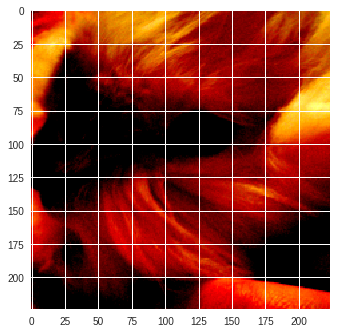

ILSVRC2012_val_00000007.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=23.123313903808594 and ind=334   My VGG: p=23.123313903808594 and ind=334 
ImageNet Label ['porcupine', 'hedgehog']


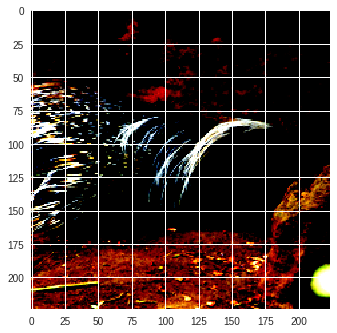

ILSVRC2012_val_00000029.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=16.78803825378418 and ind=55   My VGG: p=16.78803825378418 and ind=55 
ImageNet Label ['green', 'snake', 'grass', 'snake']


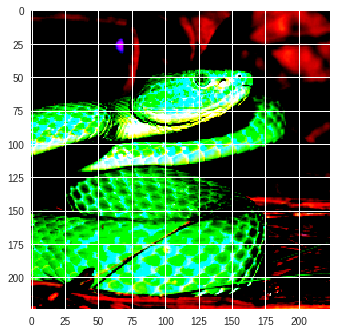

ILSVRC2012_val_00000049.JPEG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


VGG from Model Zoo: p=8.551464080810547 and ind=600   My VGG: p=8.551464080810547 and ind=600 
ImageNet Label ['hook', 'claw']


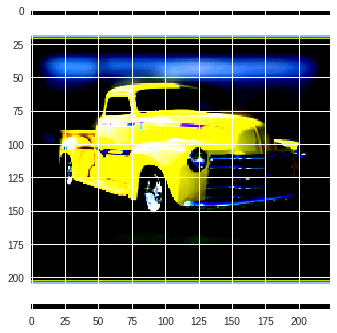

In [ ]:
path='gdrive/My Drive/data/pics'
images=os.listdir(path)
def get_img(path):
  im = Image.open(path)
  im=im.transpose(Image.ROTATE_90)
  img=np.array(test_transform(im))
  X=Variable(torch.from_numpy(img).reshape(1,*img.shape).type(torch.FloatTensor)
             ,requires_grad=False)
  return X
np.random.shuffle(images)
for i in images[1:5]:
  print (i)
  X=get_img(os.path.join(path,i))
  vgg_prob,vgg_ind = torch.max(vgg16(X),1)
  my_model_prob,my_model_ind = torch.max(model(X),1)
  print ('VGG from Model Zoo: p={} and ind={}   My VGG: p={} and ind={} '.format
         (vgg_prob.detach().numpy()[0],vgg_ind.detach().numpy()[0],my_model_prob.
          detach().numpy()[0],my_model_ind.detach().numpy()[0]))
  print ('ImageNet Label',imagenet_labels[vgg_ind])
  plt.imshow(X.numpy().squeeze().transpose([2,1,0]))
  plt.show()

In [ ]:
class Activation_Saver(VGG16):
  def forward(self,input_data):
    x=input_data
    x=self.conv1(x)
    x=self.relu1(x)
    np.save('RELU1',x.detach().numpy())
    x=self.conv2(x)
    x=self.relu2(x)
    x=self.maxpool2(x)
    x=self.conv3(x)
    x=self.relu3(x)
    x=self.conv4(x)
    x=self.relu4(x)
    x=self.maxpool4(x)
    x=self.conv5(x)
    x=self.relu5(x)
    x=self.conv6(x)
    x=self.relu6(x)
    x=self.conv7(x)
    x=self.relu7(x)
    x=self.maxpool7(x)
    x=self.conv8(x)
    x=self.relu8(x)
    x=self.conv9(x)
    x=self.relu9(x)
    x=self.conv10(x)
    x=self.relu10(x)
    x=self.maxpool10(x)
    x=self.conv11(x)
    x=self.relu11(x)
    x=self.conv12(x)
    x=self.relu12(x)
    x=self.conv13(x)
    x=self.relu13(x)
    x=self.maxpool13(x)
    x = x.view(-1, self.num_flat_features(x))
    x=self.linear1(x)
    x=self.relu1(x)
    x=self.linear2(x)
    x=self.relu2(x)
    x=self.linear3(x)
    return x

In [ ]:
h=[1234,12,34,4]
np.min(h)
np.mean(h)
np.std(h)**2

4

In [ ]:
files=os.listdir('./')
for file in files:
  if (file[-4:]=='.npy'):
    arr=np.load(file)
    dict_={}
    hist=np.histogram(arr)
    dict_['hist']=hist
    min_=np.min(arr)
    dict_['min_']=min_
    max_=np.max(arr)
    dict_['max']=max_
    var=np.var(arr)
    dict_['var']=var
    with open(file[:-4]+'_hist.pkl','wb') as file:
        pickle.dump(dict_,file)

In [ ]:
with open('conv9.weight.npyhist.pkl','rb') as file:
  dict_=pickle.load(file)
print (dict_)

{'hist': (array([      1,      12,      40,     347,   43754, 1970770,  341080,
          3160,     117,      15]), array([-0.27318269, -0.22520762, -0.17723254, -0.12925747, -0.0812824 ,
       -0.03330732,  0.01466775,  0.06264283,  0.1106179 ,  0.15859297,
        0.20656805])), 'min_': 1, 'max': 1970770, 'var': 344556673192.2399}


In [ ]:
files=os.listdir('./')
for file in files:
  if (file[-4:]=='.pkl'):
     with open(file,'rb') as file:
        dict_=pickle.load(file)
        print(dict_)

{'hist': (array([      55,     5316,  1190241, 42502512, 55529365,  3494527,
          38195,      230,        5,        2]), array([-0.0432446 , -0.03275395, -0.02226329, -0.01177263, -0.00128198,
        0.00920868,  0.01969934,  0.03019   ,  0.04068065,  0.05117131,
        0.06166197])), 'min_': 2, 'max': 55529365, 'var': 384763281606294.4}
{'hist': (array([ 1,  0,  3,  4, 11, 22, 12,  4,  3,  4]), array([-0.82775062, -0.67998104, -0.53221146, -0.38444188, -0.23667229,
       -0.08890271,  0.05886687,  0.20663645,  0.35440603,  0.50217562,
        0.6499452 ])), 'min_': 0, 'max': 22, 'var': 40.64}
{'hist': (array([2298097,  438998,  227765,  112459,   75401,   35770,   12617,
          3808,    2000,    4349]), array([0.        , 0.36957722, 0.73915443, 1.10873165, 1.47830887,
       1.84788609, 2.2174633 , 2.58704052, 2.95661774, 3.32619495,
       3.69577217])), 'min_': 2000, 'max': 2298097, 'var': 451443274660.44006}
{'hist': (array([  1,   0,   1,  15,  85, 266, 109,  27,   6, 